In [4]:
import pandas as pd

sp500 = pd.read_csv('~/gdrive/sync-data/sp500-yearly-performance.csv')
sp500['Date'] = pd.to_datetime(sp500['Date'])
sp500.tail()

,Date,Returns
60,2017-12-29,19.42
61,2018-12-31,-6.24
62,2019-12-31,29.24
63,2020-12-31,16.26
64,2021-04-14,9.81


In [9]:
from datetime import timedelta
year = timedelta(days=365)
(sp500.Date[4] - sp500.Date[3]) / year

1 < 2 < 2

False

In [30]:
def relmin(vals):
    vals = list(vals)
    padded_vals = [float('inf')] + vals + [float('inf')]
    return [i for i in range(len(vals)) if padded_vals[i] >= padded_vals[i+1] <= padded_vals[i+2]]
def relmax(vals):
    vals = list(vals)
    padded_vals = [-float('inf')] + vals + [-float('inf')]
    return [i for i in range(len(vals)) if padded_vals[i] <= padded_vals[i+1] >= padded_vals[i+2]]

print(relmin([1, 3, 2, 5, 6, 4])) # Should be [0,2,5]
print(relmax([1, 3, 2, 5, 6, 4])) # Should be [1,4]

[0, 2, 5]
[1, 4]


In [80]:
from pprint import pprint

inds_min = relmin(sp500.Returns)
gaps_min = [round((sp500.Date[inds_min[j]] - sp500.Date[inds_min[j-1]]) / year) for j in range(1, len(inds_min))]
print(inds_min)
pprint(gaps_min)
print(max(gaps_min) - min(gaps_min))


[0, 3, 5, 9, 12, 17, 20, 24, 27, 30, 33, 35, 37, 39, 45, 48, 51, 54, 58, 61, 64]
[3, 2, 4, 3, 5, 3, 4, 3, 3, 3, 2, 2, 2, 6, 3, 3, 3, 4, 3, 2]
4


In [81]:
inds_max = relmax(sp500.Returns)
gaps_max = [round((sp500.Date[inds_max[j]] - sp500.Date[inds_max[j-1]]) / year) for j in range(1, len(inds_max))]
print(inds_max)
pprint(gaps_max)
print(max(gaps_max) - min(gaps_max))

[1, 4, 6, 10, 15, 18, 23, 26, 28, 32, 34, 36, 38, 40, 46, 49, 52, 56, 60, 62]
[3, 2, 4, 5, 3, 5, 3, 2, 4, 2, 2, 2, 2, 6, 3, 3, 4, 4, 2]
4


In [82]:
all(inds_min[i] <= inds_max[i] <= inds_min[i+1] for i in range(len(inds_max)))

True

[1.5 2.5 3.5 4.5 5.5]
[3, 2, 4, 3, 5, 3, 4, 3, 3, 3, 2, 2, 2, 6, 3, 3, 3, 4, 3, 2]


(array([0.26315789, 0.52631579, 0.15789474, 0.05263158]),
 array([1.5, 2.5, 3.5, 4.5, 5.5]),
 <BarContainer object of 4 artists>)

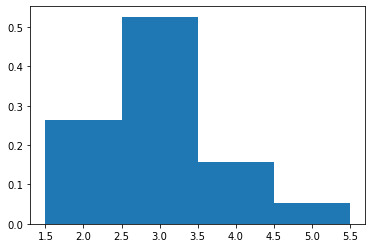

In [61]:
import matplotlib.pyplot as plt
def plot(gaps):
    bins=np.unique(gaps) - 0.5
    print(bins)
    print(gaps)
    return plt.hist(gaps, bins=bins, density=True)
plot(gaps_min)

[1.5 2.5 3.5 4.5 5.5]
[3, 2, 4, 5, 3, 5, 3, 2, 4, 2, 2, 2, 2, 6, 3, 3, 4, 4, 2]


(array([0.38888889, 0.27777778, 0.22222222, 0.11111111]),
 array([1.5, 2.5, 3.5, 4.5, 5.5]),
 <BarContainer object of 4 artists>)

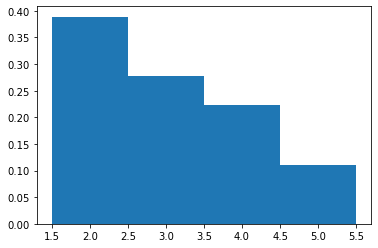

In [62]:
plot(gaps_max)

[1.0, 1.6, 1]
[1.5 2.5 3.5 4.5 5.5]
[3, 2, 4, 3, 5, 3, 4, 3, 3, 3, 2, 2, 2, 6, 3, 3, 3, 4, 3, 2]


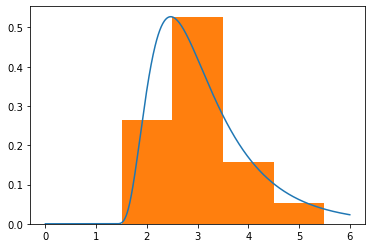

In [77]:
import scipy.stats as stats
import numpy as np

def plot_comparison(gaps, loc=None, scale=None):
    initial_guess = list(stats.lognorm._fitstart(gaps))
    print(initial_guess)
    if loc is None:
        loc = initial_guess[1]
    if scale is None:
        scale = initial_guess[2]
    
    param=stats.lognorm.fit(gaps, loc = loc, scale=scale) # fit the sample data
    
    x=np.linspace(0,max(gaps), max(gaps) * 100)
    pdf_fitted = stats.lognorm.pdf(x, param[0], loc=param[1], scale=param[2])
    
    plt.plot(x, pdf_fitted)
    plot(gaps)

plot_comparison(gaps_min, loc=1)

[1.0, 1.6, 1]
[1.5 2.5 3.5 4.5 5.5]
[3, 2, 4, 5, 3, 5, 3, 2, 4, 2, 2, 2, 2, 6, 3, 3, 4, 4, 2]


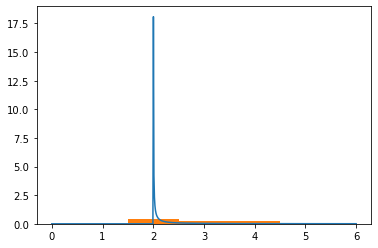

In [79]:
plot_comparison(gaps_max, loc=1, scale=1.1)